In [288]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly



In [305]:
df=pd.read_csv('DataSARIMAX.csv',sep=';', decimal=',', index_col='DATE', parse_dates=True, dayfirst=True)
pd.set_option('display.float_format', '{:,.2f}'.format)
df.sort_index(inplace=True)
print(df.shape)
df.head()

(365, 4)


,DAY,HOLIDAY,HOLIDAY_NAME,VOLUME
DATE,,,,
2022-06-01,Wednesday,1,Hari Lahir Pancasila,44003.56
2022-06-02,Thursday,0,na,48991.85
2022-06-03,Friday,0,na,51690.92
2022-06-04,Saturday,0,na,47790.83
2022-06-05,Sunday,0,na,42896.64


In [306]:
df['VOLUME'] = df['VOLUME'].astype(float)
df['HOLIDAY'] = df['HOLIDAY'].astype(int)
print(df.dtypes)
df.head()

DAY              object
HOLIDAY           int32
HOLIDAY_NAME     object
VOLUME          float64
dtype: object


,DAY,HOLIDAY,HOLIDAY_NAME,VOLUME
DATE,,,,
2022-06-01,Wednesday,1,Hari Lahir Pancasila,"44,003.56"
2022-06-02,Thursday,0,na,"48,991.85"
2022-06-03,Friday,0,na,"51,690.92"
2022-06-04,Saturday,0,na,"47,790.83"
2022-06-05,Sunday,0,na,"42,896.64"


In [307]:
df_edit = df.drop(df.columns[[0, 1, 2]], axis=1)
df_edit.head()

,VOLUME
DATE,
2022-06-01,"44,003.56"
2022-06-02,"48,991.85"
2022-06-03,"51,690.92"
2022-06-04,"47,790.83"
2022-06-05,"42,896.64"


In [323]:
df_edit.reset_index( inplace=True)
df_edit.head()

,DATE,VOLUME
0,2022-06-01,"44,003.56"
1,2022-06-02,"48,991.85"
2,2022-06-03,"51,690.92"
3,2022-06-04,"47,790.83"
4,2022-06-05,"42,896.64"


In [324]:
df_edit.rename(columns={'DATE':'ds'}, inplace=True)
df_edit.rename(columns={'VOLUME':'y'}, inplace=True)
df_edit

,ds,y
0,2022-06-01,"44,003.56"
1,2022-06-02,"48,991.85"
2,2022-06-03,"51,690.92"
3,2022-06-04,"47,790.83"
4,2022-06-05,"42,896.64"
...,...,...
360,2023-05-27,"42,088.95"
361,2023-05-28,"34,965.85"
362,2023-05-29,"41,785.99"
363,2023-05-30,"44,387.87"


Prophet With Spliting Data Set

In [7]:
# Split the data into train and test sets
train_size = int(len(df_edit) * 0.8)  # Use 80% of the data for training
train = df_edit.iloc[:train_size]
test = df_edit.iloc[train_size:]
print(df_edit.shape)
print(train.shape,test.shape)

(365, 2)
(292, 2) (73, 2)


In [8]:
model.add_seasonality(name="weekly", period=7, fourier_order=10)

In [9]:
# Train the model
model.fit(train)


11:21:02 - cmdstanpy - INFO - Chain [1] start processing
11:21:02 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future_dates = model.make_future_dataframe(len(test))
future_dates

,ds
0,2022-06-01
1,2022-06-02
2,2022-06-03
3,2022-06-04
4,2022-06-05
...,...
360,2023-05-27
361,2023-05-28
362,2023-05-29
363,2023-05-30


In [15]:
prediction =  model.predict(future_dates)

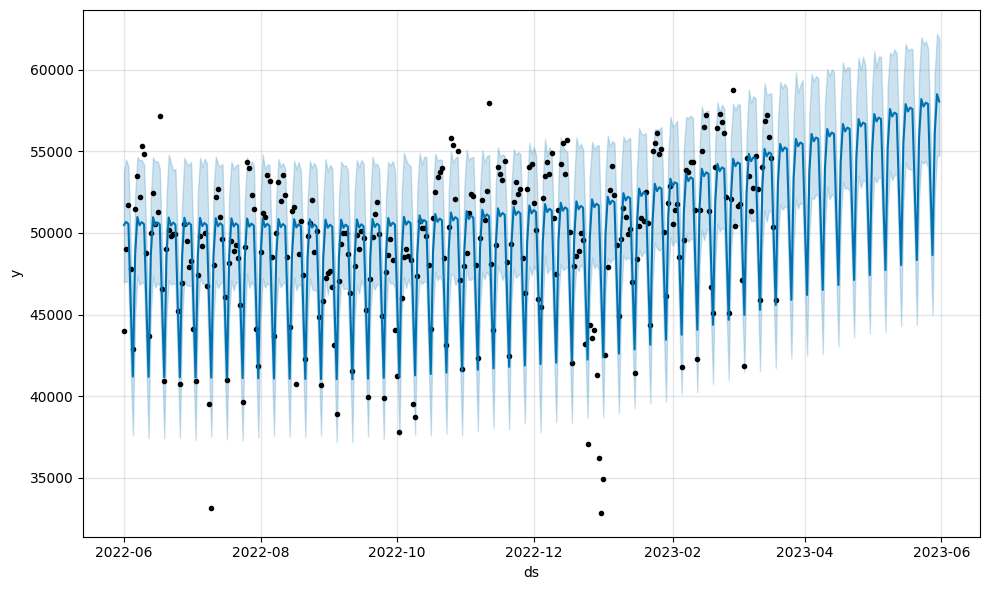

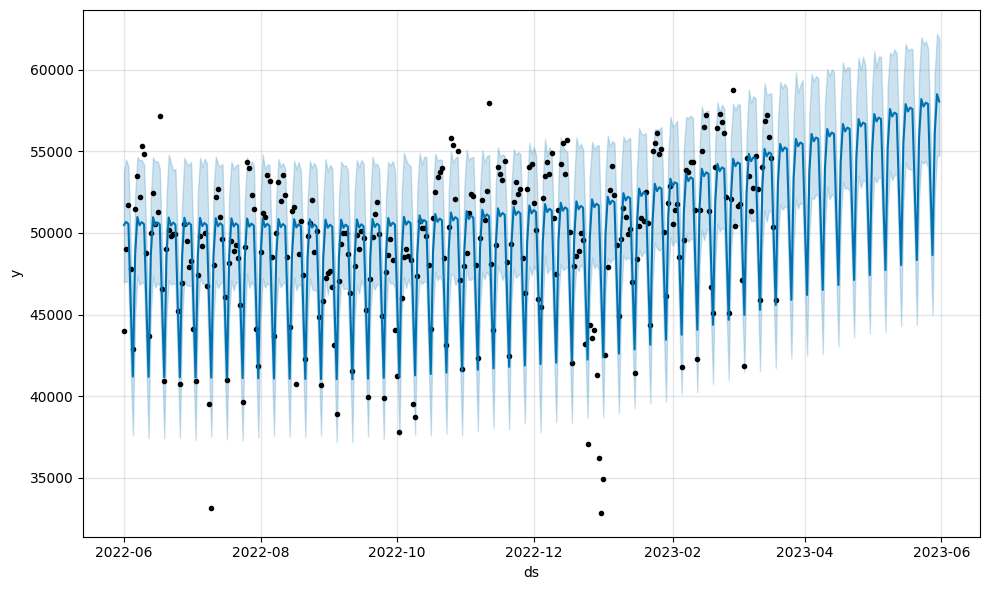

In [16]:
# Plot Prediction
model.plot(prediction)

prophet with full data set

In [193]:
m = Prophet(weekly_seasonality = True, seasonality_prior_scale=0.1, 
            changepoint_range=1, changepoint_prior_scale = 0.4)


In [194]:
forecast = m.fit(df_edit)

22:06:38 - cmdstanpy - INFO - Chain [1] start processing


22:06:39 - cmdstanpy - INFO - Chain [1] done processing


In [195]:
future = m.make_future_dataframe(periods=30)
future.tail

<bound method NDFrame.tail of             ds
0   2022-06-01
1   2022-06-02
2   2022-06-03
3   2022-06-04
4   2022-06-05
..         ...
390 2023-06-26
391 2023-06-27
392 2023-06-28
393 2023-06-29
394 2023-06-30

[395 rows x 1 columns]>

In [196]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
390,2023-06-26,"39,973.28","32,169.57","47,129.50"
391,2023-06-27,"42,128.51","34,437.02","49,217.19"
392,2023-06-28,"41,326.93","33,978.56","48,853.47"
393,2023-06-29,"41,274.18","33,745.83","49,194.82"
394,2023-06-30,"41,061.74","33,336.22","48,709.62"


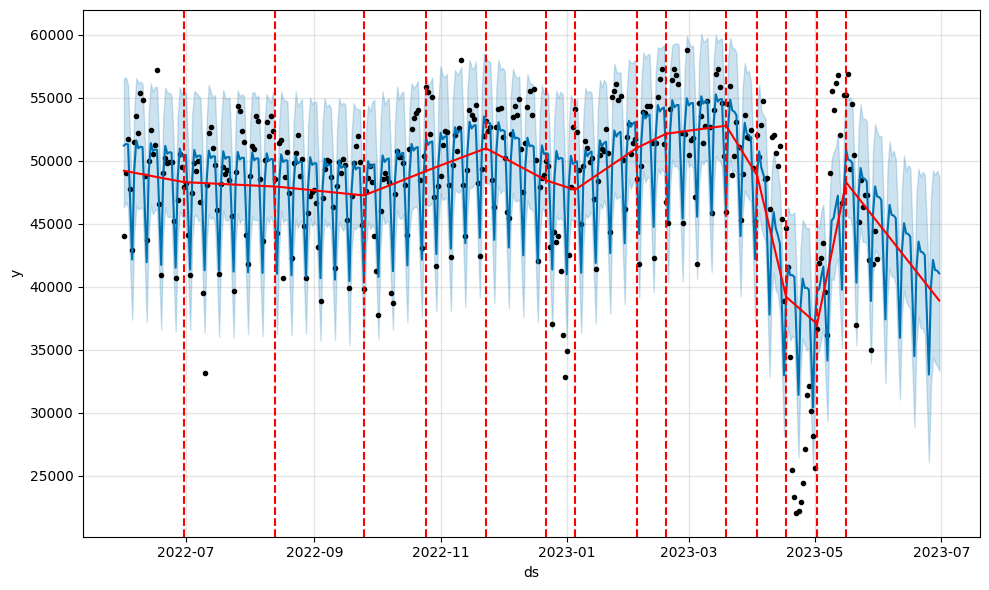

In [197]:
fig1 = m.plot(forecast)
fig1 = add_changepoints_to_plot(fig1.gca(), m, forecast)


prophet with full data set and holiday

In [308]:
df

,DAY,HOLIDAY,HOLIDAY_NAME,VOLUME
DATE,,,,
2022-06-01,Wednesday,1,Hari Lahir Pancasila,"44,003.56"
2022-06-02,Thursday,0,na,"48,991.85"
2022-06-03,Friday,0,na,"51,690.92"
2022-06-04,Saturday,0,na,"47,790.83"
2022-06-05,Sunday,0,na,"42,896.64"
...,...,...,...,...
2023-05-27,Saturday,0,na,"42,088.95"
2023-05-28,Sunday,0,na,"34,965.85"
2023-05-29,Monday,0,na,"41,785.99"


In [318]:
holiday_date = df.copy()
holiday_date.reset_index(inplace=True)
holiday_date = holiday_date.drop(holiday_date.columns[[1,4]], axis=1)
holiday_date = holiday_date[holiday_date['HOLIDAY']!=0]
holiday_date = holiday_date.reset_index(inplace=False)
holiday_date = holiday_date.drop(holiday_date.columns[[0]], axis=1)
holiday_date['HOLIDAY_NAME'] = holiday_date['HOLIDAY_NAME'].str.strip()
holiday_date['HOLIDAY_NAME'] = holiday_date['HOLIDAY_NAME'].str.replace(' ', '_')
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Imlek']
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Idul_Fitri']
holiday_date = holiday_date[holiday_date['HOLIDAY_NAME']!='Nyepi']
holiday_date

,DATE,HOLIDAY,HOLIDAY_NAME
0,2022-06-01,1,Hari_Lahir_Pancasila
1,2022-07-09,1,Idul_Adha
2,2022-07-30,1,Tahun_Baru_Islam
3,2022-08-17,1,Hari_Kemerdekaan
4,2022-10-08,1,Maulid_Nabi
5,2022-12-05,1,Natal
6,2023-01-01,1,Tahun_Baru
9,2023-02-18,1,Isra_Mikraj
12,2023-04-07,1,Wafat_Isa_Almasih
20,2023-05-01,1,Hari_Buruh


In [319]:
holiday_date = holiday_date.rename(columns={"DATE":'ds','HOLIDAY_NAME':'holiday'})
holiday_date['ds_upper'] = holiday_date['ds']
holiday_date['lower_window'] = 0
holiday_date['upper_window'] = 1
new_order = ['holiday', 'ds', 'lower_window', 'ds_upper', 'upper_window']
holiday_date =holiday_date[new_order]
holiday_date

,holiday,ds,lower_window,ds_upper,upper_window
0,Hari_Lahir_Pancasila,2022-06-01,0,2022-06-01,1
1,Idul_Adha,2022-07-09,0,2022-07-09,1
2,Tahun_Baru_Islam,2022-07-30,0,2022-07-30,1
3,Hari_Kemerdekaan,2022-08-17,0,2022-08-17,1
4,Maulid_Nabi,2022-10-08,0,2022-10-08,1
5,Natal,2022-12-05,0,2022-12-05,1
6,Tahun_Baru,2023-01-01,0,2023-01-01,1
9,Isra_Mikraj,2023-02-18,0,2023-02-18,1
12,Wafat_Isa_Almasih,2023-04-07,0,2023-04-07,1
20,Hari_Buruh,2023-05-01,0,2023-05-01,1


In [320]:
# Python
holiday = pd.DataFrame([
    {'holiday': 'Imlek', 'ds': '2023-01-22', 'lower_window': 0, 'ds_upper': '2023-01-23'},
    {'holiday': 'Nyepi', 'ds': '2023-03-22', 'lower_window': 0, 'ds_upper': '2023-03-23'},
    {'holiday': 'Idul_Fitri', 'ds': '2023-04-19', 'lower_window': 0, 'ds_upper': '2023-04-25'},
])

for t_col in ['ds', 'ds_upper']:
    holiday[t_col] = pd.to_datetime(holiday[t_col])
holiday['upper_window'] = ((holiday['ds_upper'] - holiday['ds'])).dt.days + 1
holiday

,holiday,ds,lower_window,ds_upper,upper_window
0,Imlek,2023-01-22,0,2023-01-23,2
1,Nyepi,2023-03-22,0,2023-03-23,2
2,Idul_Fitri,2023-04-19,0,2023-04-25,7


In [321]:
holiday = holiday.append(holiday_date)
holiday = holiday.sort_values('ds')
holiday

C:\Users\rizki\AppData\Local\Temp\ipykernel_10436\363067817.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  holiday = holiday.append(holiday_date)


,holiday,ds,lower_window,ds_upper,upper_window
0,Hari_Lahir_Pancasila,2022-06-01,0,2022-06-01,1
1,Idul_Adha,2022-07-09,0,2022-07-09,1
2,Tahun_Baru_Islam,2022-07-30,0,2022-07-30,1
3,Hari_Kemerdekaan,2022-08-17,0,2022-08-17,1
4,Maulid_Nabi,2022-10-08,0,2022-10-08,1
5,Natal,2022-12-05,0,2022-12-05,1
6,Tahun_Baru,2023-01-01,0,2023-01-01,1
0,Imlek,2023-01-22,0,2023-01-23,2
9,Isra_Mikraj,2023-02-18,0,2023-02-18,1
1,Nyepi,2023-03-22,0,2023-03-23,2


In [325]:
df_no_outlier = df_edit.copy()
df_no_outlier.loc[(df_no_outlier['ds'] >= '2023-04-19') & (df_no_outlier['ds'] <= '2023-05-03'), 'y'] = None

filtered_df = df_no_outlier.loc[(df_no_outlier['ds'] >= '2023-04-19') & (df_no_outlier['ds'] <= '2023-05-03')]
filtered_df

,ds,y
322,2023-04-19,NaN
323,2023-04-20,NaN
324,2023-04-21,NaN
325,2023-04-22,NaN
326,2023-04-23,NaN
327,2023-04-24,NaN
328,2023-04-25,NaN
329,2023-04-26,NaN
330,2023-04-27,NaN
331,2023-04-28,NaN


In [413]:
m = Prophet(weekly_seasonality = True, seasonality_prior_scale=0.2, 
            changepoint_range=1, changepoint_prior_scale = 0.25,
            holidays=holiday)


In [414]:
#NORMAL
forecast = m.fit(df_edit)

05:28:06 - cmdstanpy - INFO - Chain [1] start processing


05:28:06 - cmdstanpy - INFO - Chain [1] done processing


In [415]:
# #REMOVE OUTLIER
# forecast = m.fit(df_no_outlier)

In [416]:
future = m.make_future_dataframe(periods=30)
future.tail

<bound method NDFrame.tail of             ds
0   2022-06-01
1   2022-06-02
2   2022-06-03
3   2022-06-04
4   2022-06-05
..         ...
390 2023-06-26
391 2023-06-27
392 2023-06-28
393 2023-06-29
394 2023-06-30

[395 rows x 1 columns]>

In [417]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
390,2023-06-26,"46,602.49","42,236.42","50,879.24"
391,2023-06-27,"48,754.96","44,761.85","52,858.93"
392,2023-06-28,"48,699.80","43,949.20","52,843.69"
393,2023-06-29,"48,301.59","44,074.08","52,660.14"
394,2023-06-30,"48,150.31","43,560.31","52,554.82"


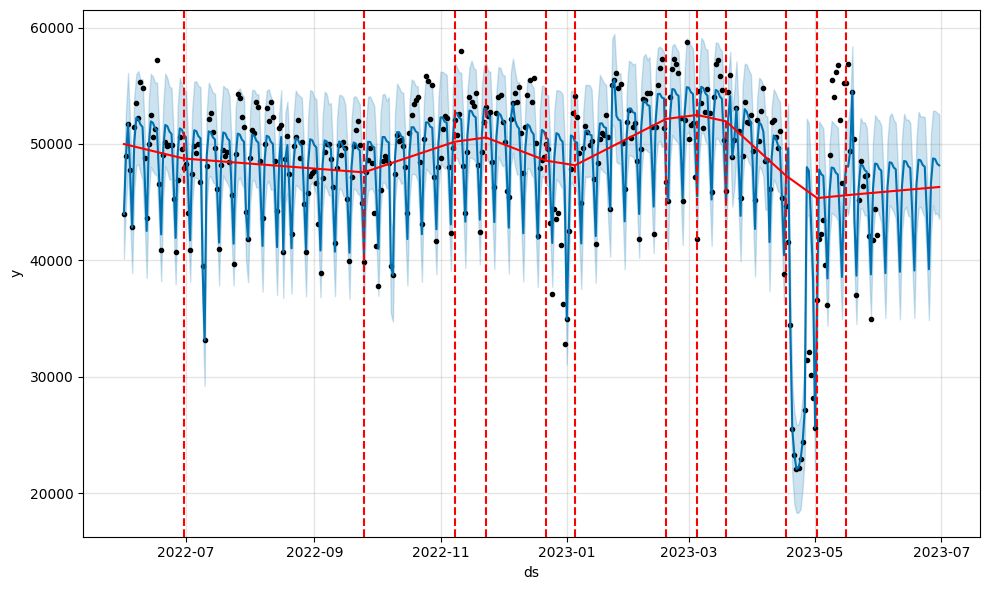

In [421]:
fig1 = m.plot(forecast)
fig1 = add_changepoints_to_plot(fig1.gca(), m, forecast)



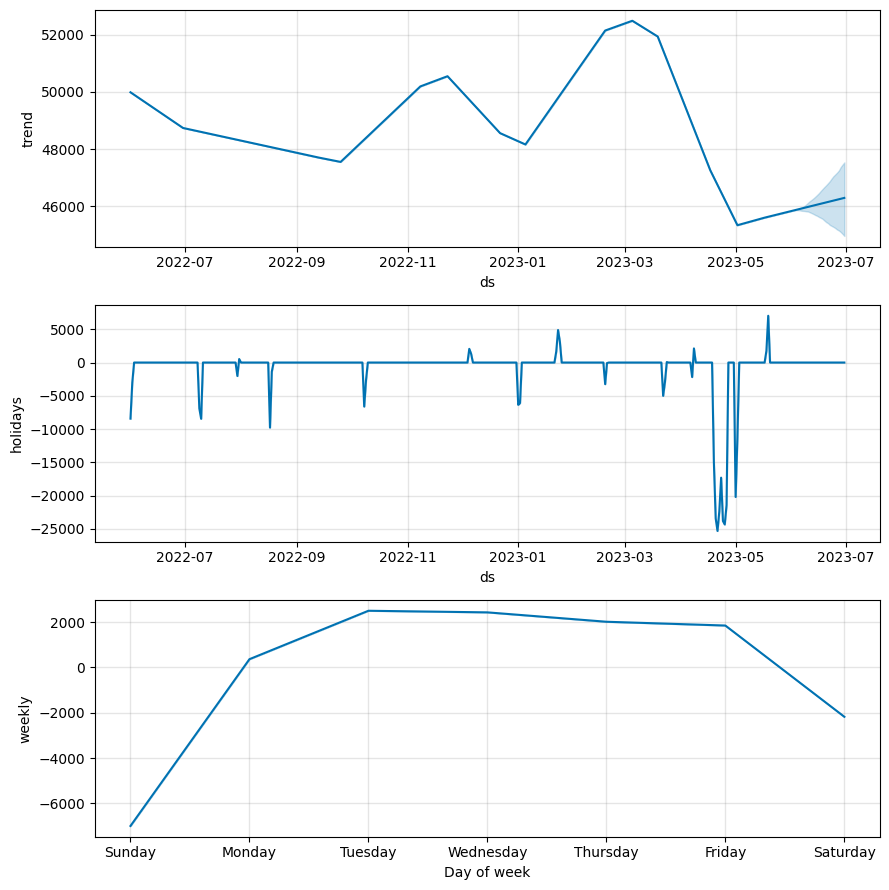

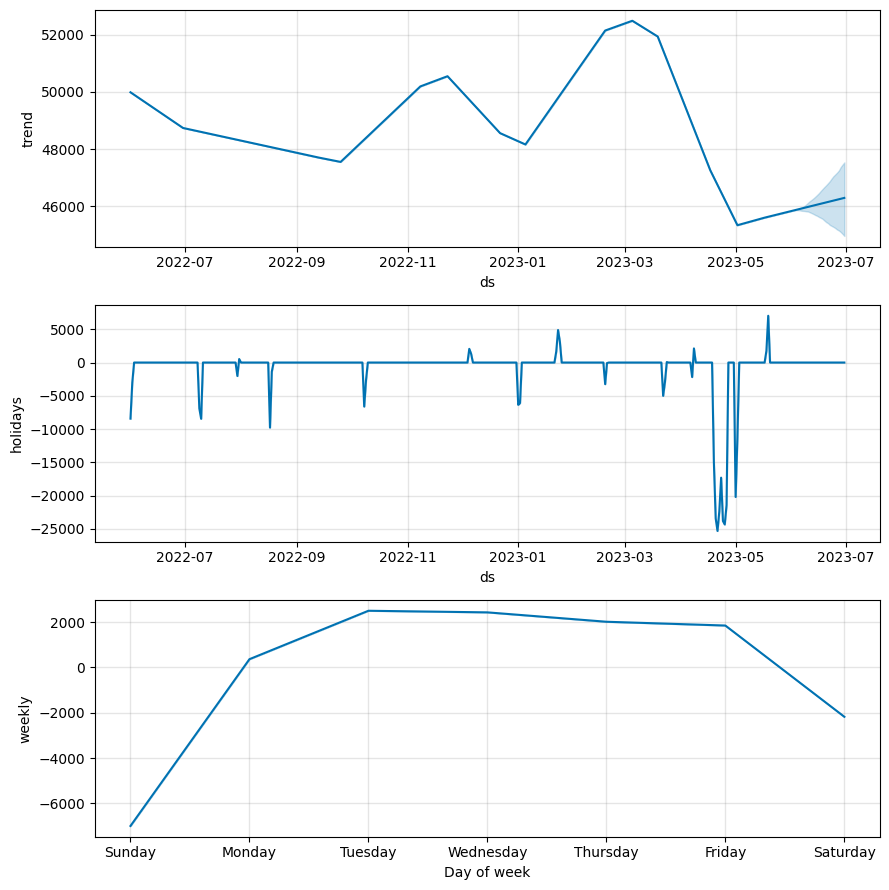

In [419]:
m.plot_components(forecast)